<a href="https://colab.research.google.com/github/Artorius81/labs_ml_basov/blob/main/labs/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_%D0%91%D0%B0%D1%81%D0%BE%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [ ]:
!pip install pandas
!pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

**ВЫБОР ПЕРЕМЕННЫХ**
1. Категориальная целевая переменная - *Metropolitan/Nonmetropolitan*
2. Переменная для анализа относительно категории - *Motor vehicle theft*

In [2]:
df = pd.read_csv("/content/ca_offenses_by_county.csv")
df

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape(legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510,6.0,13.0,NaN,177,314,"2,077",463,985,629,11.0
1,Metropolitan Counties,Butte3,155,4.0,20.0,NaN,14,117,"1,422",708,693,21,0.0
2,Metropolitan Counties,Contra Costa,426,14.0,24.0,NaN,153,235,"2,013",660,"1,332",21,18.0
3,Metropolitan Counties,El Dorado3,252,9.0,46.0,NaN,32,165,"2,031",577,"1,412",42,4.0
4,Metropolitan Counties,Fresno,962,8.0,32.0,NaN,112,810,"3,810","1,398","1,838",574,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# фикс
from numpy import nan

def convert_to_float(df, column_name):
    # Convert the column to string, replace non-numeric values and NaN with empty strings, then convert to float
    df[column_name] = df[column_name].astype(str).str.replace('[^0-9.]', '', regex=True).replace('', nan).astype(float)
    return df[column_name]

# Example for replace the column dtype
df['Motor vehicle theft'] = convert_to_float(df, 'Motor vehicle theft')
df['Violent crime'] = convert_to_float(df, 'Violent crime')
df['Motor vehicle theft']

0       629.0
1        21.0
2        21.0
3        42.0
4       574.0
        ...  
2587      NaN
2588      NaN
2589      NaN
2590      NaN
2591      NaN
Name: Motor vehicle theft, Length: 2592, dtype: float64

In [4]:
df.describe()

,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape(legacy definition),Motor vehicle theft,Arson
count,57.000000,57.000000,57.000000,0.0,57.000000,57.000000
mean,438.491228,6.614035,32.385965,NaN,219.192982,20.526316
std,827.081209,14.315020,49.598659,NaN,651.523721,50.934519
min,3.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,87.000000,1.000000,7.000000,NaN,4.000000,0.000000
50%,213.000000,3.000000,18.000000,NaN,14.000000,6.000000
75%,383.000000,6.000000,32.000000,NaN,51.000000,15.000000
max,5173.000000,98.000000,304.000000,NaN,4203.000000,300.000000


In [5]:
# среднее
mean = df['Motor vehicle theft'].mean()
# медиана
median = df['Motor vehicle theft'].median()
# мода
mode = df.groupby(["Metropolitan/Nonmetropolitan"])["Motor vehicle theft"].agg(pd.Series.mode)
# минимум
min = df['Motor vehicle theft'].min()
# максимум
max = df['Motor vehicle theft'].max()
# стандартное отклонение
std = df['Motor vehicle theft'].std()

print(f'Среднее: {mean}')
print(f'Медиана: {median}')
print(f'Мода: {mode}')
print(f'Минимум: {min}')
print(f'Максимум: {max}')
print(f'Стандартное отклонение: {std}')

Среднее: 219.19298245614036
Медиана: 14.0
Мода: Metropolitan/Nonmetropolitan
Metropolitan Counties       42.0
Nonmetropolitan Counties     1.0
Name: Motor vehicle theft, dtype: float64
Минимум: 0.0
Максимум: 4203.0
Стандартное отклонение: 651.5237206129209


Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [6]:
# 25% квантиль
q1 = df['Motor vehicle theft'].quantile(0.25)
# 50% квантиль
q2 = df['Motor vehicle theft'].quantile(0.5)
# 75% квантиль
q3 = df['Motor vehicle theft'].quantile(0.75)
# интерквантильный размах
iqr = q3 - q1

print(f'25% квантиль: {q1}')
print(f'50% квантиль: {q2}')
print(f'75% квантиль: {q3}')
print(f'интерквантильный размах: {iqr}')

25% квантиль: 4.0
50% квантиль: 14.0
75% квантиль: 51.0
интерквантильный размах: 47.0


Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

```
Well, можно точно сделать вывод, что в Metropolitan Counties совершается больше хищений автомобилей, чем в Nonmetropolitans Counties.

Стандартное отклонение довольно большое. Что может значить - довольно большой разброс данных.
```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

In [7]:
import plotly.express as px
summ = df.groupby(["County"])["Motor vehicle theft", "Metropolitan/Nonmetropolitan"].agg(pd.Series.sum)
px.histogram(summ, y='Metropolitan/Nonmetropolitan', x='Motor vehicle theft', barmode='group')

<ipython-input-7-b96413338c3c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summ = df.groupby(["County"])["Motor vehicle theft", "Metropolitan/Nonmetropolitan"].agg(pd.Series.sum)


**ФОТО ГРАФИКА plot express**

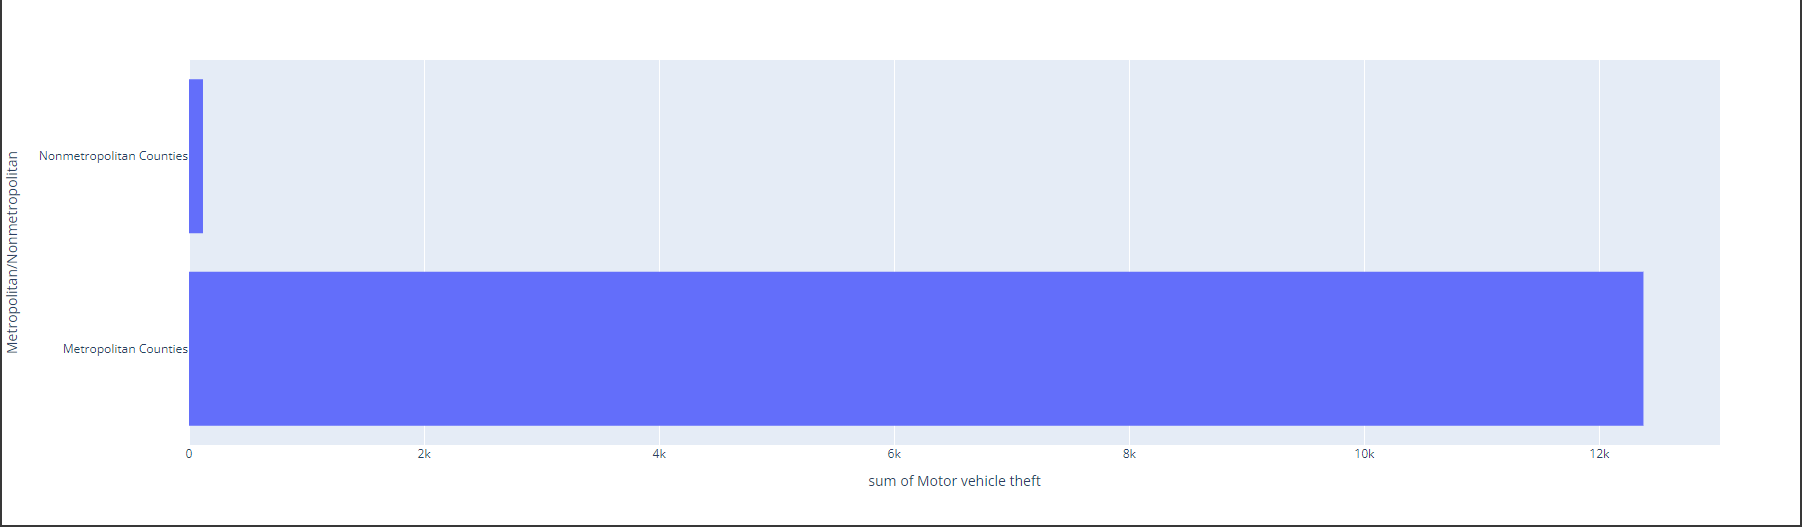

**По графику можно сделать вывод, что в Metropolitan Counties совершается больше хищений автомобилей, чем в Nonmetropolitan.**

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

In [8]:
px.box(df['Violent crime'])

**ФОТО ГРАФИКА plot express**

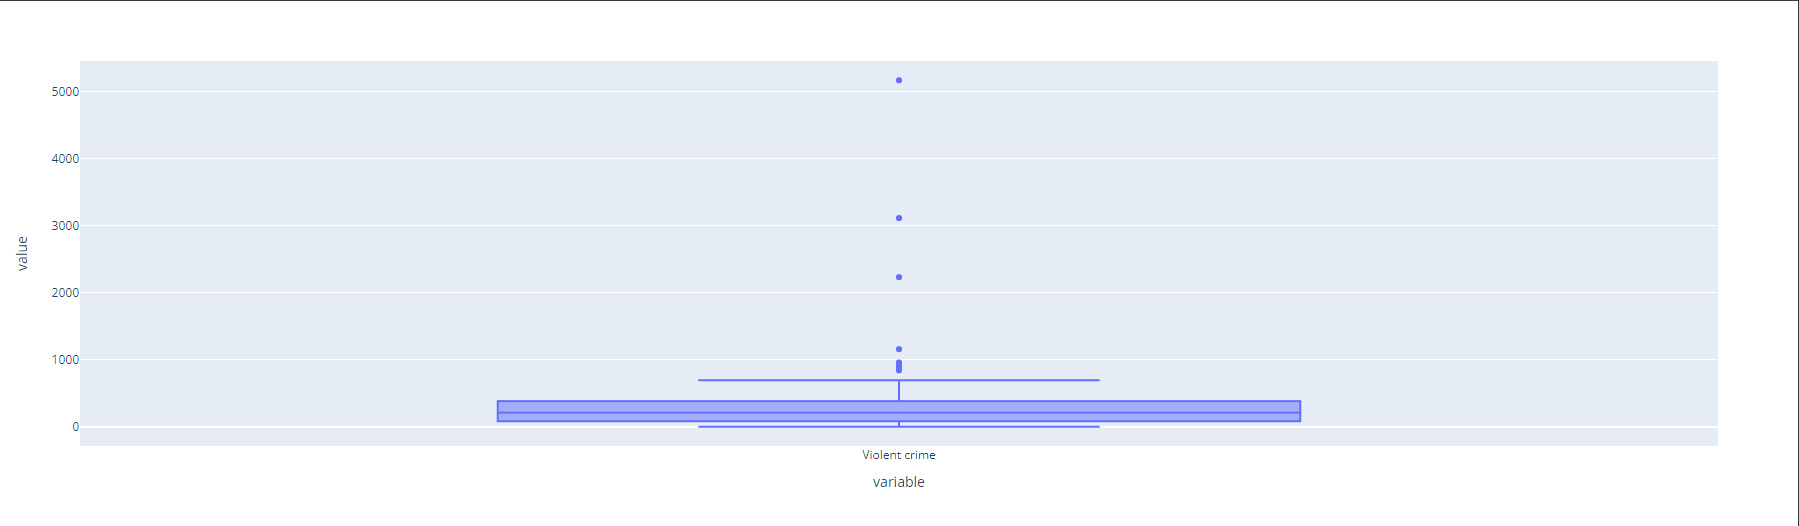

**По графику видно, что особо размаха значений не наблюдается. Существует несколько "аномально" высоких значений в сравнении в основной выборкой.**

In [9]:
px.box(df, x='Metropolitan/Nonmetropolitan', y='Motor vehicle theft')

**ФОТО ГРАФИКА plot express**

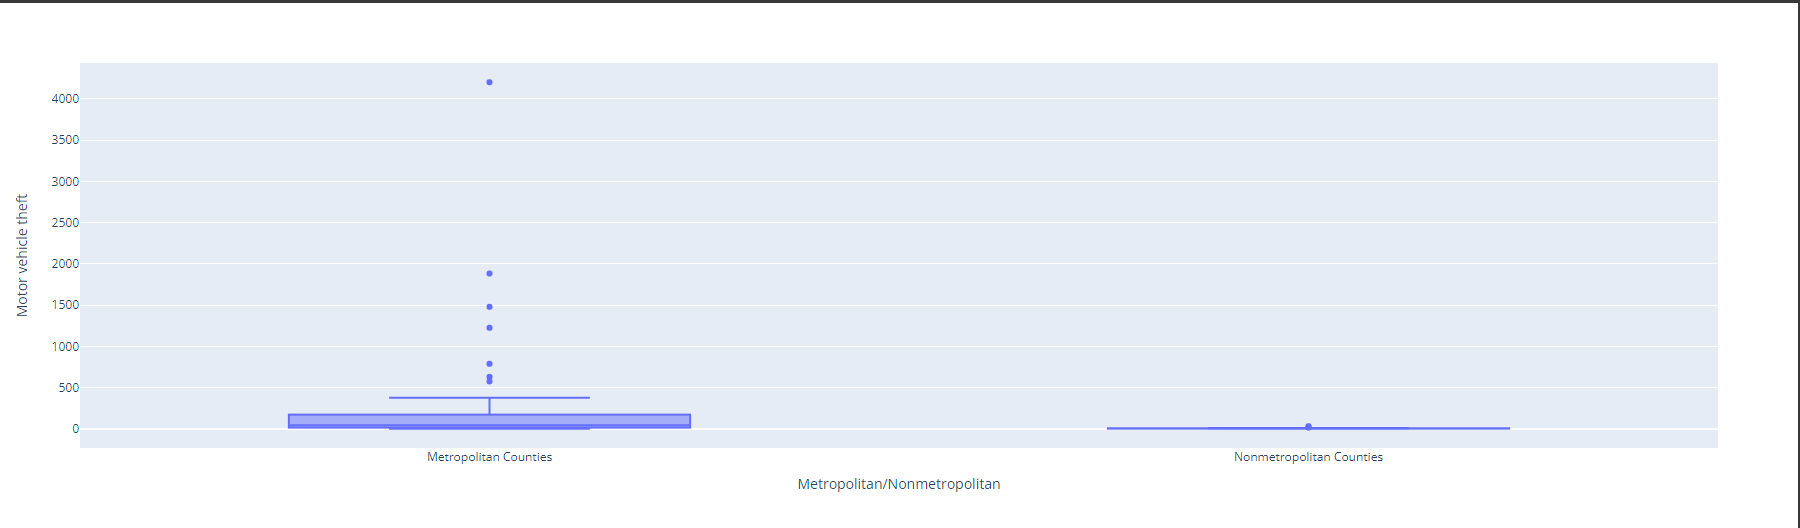

**Относительно категориальной переменной мы видим несколько значений из выборки (Metropolitan Counties), которые выбиваются. Однако в Nonmetropolitan Counties таких значений почти нет (вероятно потому что данных по MC > NMC)**

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

In [10]:
px.scatter(df, x = 'Motor vehicle theft', y = 'Arson')

**ФОТО ГРАФИКА plot express**

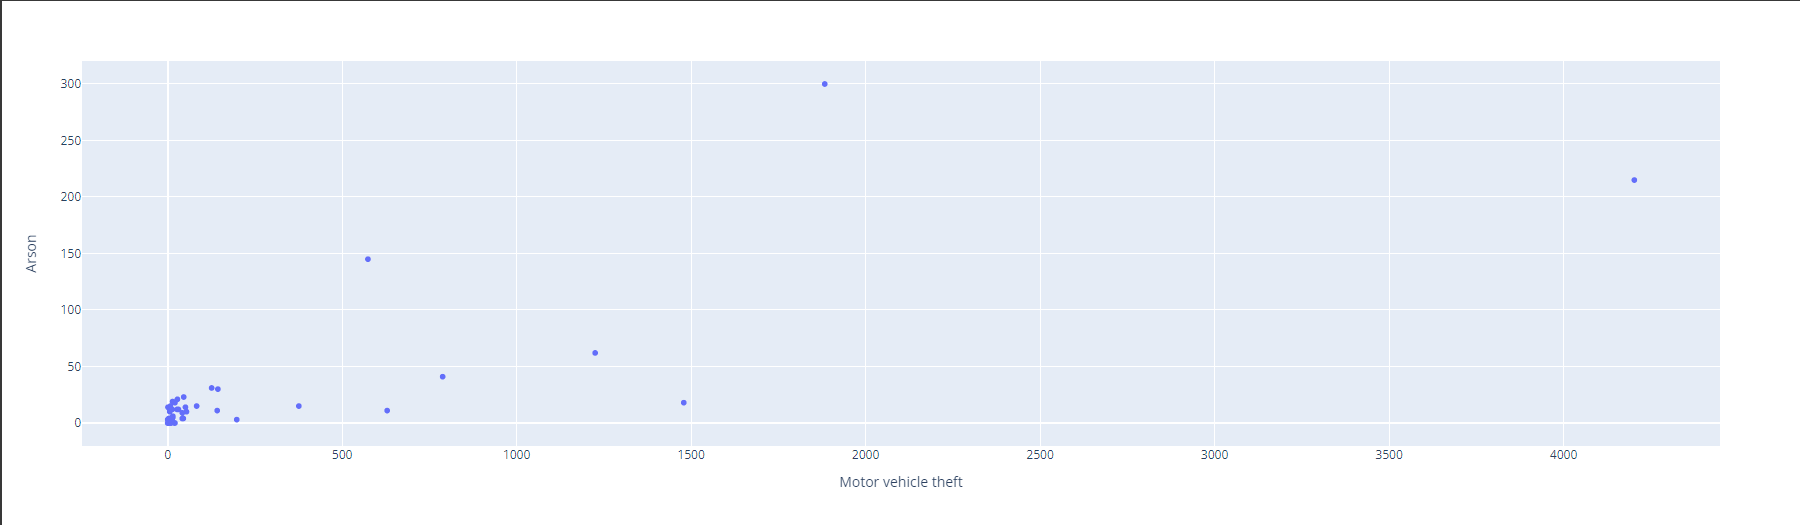

**По графику видно, что c увеличением числа Arson (поджогов) немного растет число хищений авто (Motor vehicle theft).**

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

In [11]:
px.imshow(df.corr())

<ipython-input-11-0dfbac1aba16>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**ФОТО ГРАФИКА plot express**

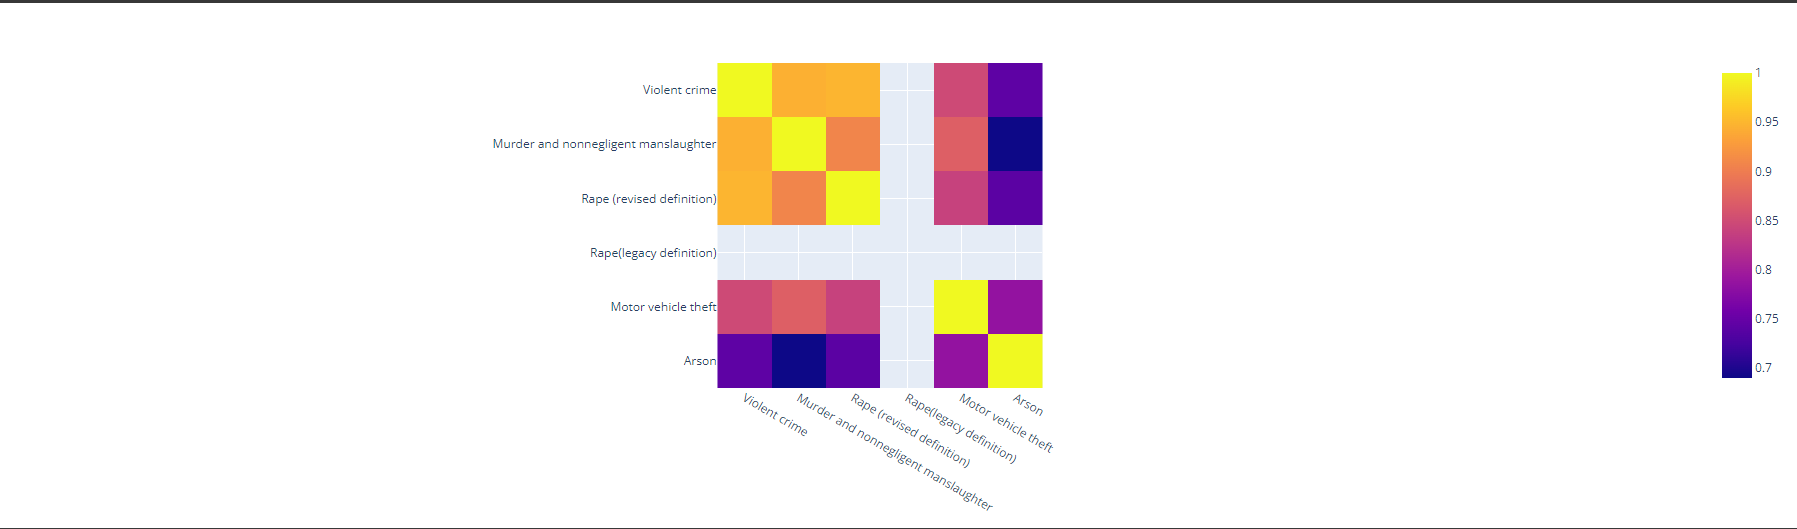

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Ответ здесь**

По матрице корреляции можно сделать вывод, что многие признаки коррелируют между собой (связаны)

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

**ОБЩИЙ КЛАСС**

In [173]:
import numpy as np
from sklearn.cluster import DBSCAN
from scipy import stats

class Outline:
    def __init__(self, data):
      self.data = data

    # среднее и отклонение
    def detect_outlier_mean_std(self, column_name, threshold=1.5):
      mean = self.data[column_name].mean()
      std = self.data[column_name].std()
      lower_bound = mean - threshold * std
      upper_bound = mean + threshold * std

      outliers = (self.data[column_name] >= lower_bound) & (self.data[column_name] >= upper_bound)
      return self.data[outliers]

    # квартили
    def detect_outlier_kvart(self, column_name, threshold=1.5):
      # threshold определяет, насколько далеко за пределами межквартильного диапазона (IQR) считать точку выбросом. 1.5 - стандартное значение
      Q1 = self.data[column_name].quantile(0.25)
      Q3 = self.data[column_name].quantile(0.75)

      IQR = Q3 - Q1

      lower_threshold = Q1 - threshold * IQR
      upper_threshold = Q3 + threshold * IQR

      outliers = (self.data[column_name] < lower_threshold) | (self.data[column_name] > upper_threshold)

      return self.data[outliers]

    # Шовене
    def detect_outlier_shovene(self, column_name):
      column_data = self.data[column_name]
      mean = np.mean(column_data)
      std_dev = np.std(column_data)
      n = len(column_data)
      critical_value = 1.0 / (2 * n)

      z_scores = abs((column_data - mean) / std_dev)
      p_values = 2 * (1 - stats.norm.cdf(z_scores))
      is_outlier = p_values < critical_value

      outliers = self.data[is_outlier]
      return outliers

    # по двум переменным (подсказали про кластеризацию и dbscan на паре)
    def detect_outlier_dbscan(self, col1, col2, eps, min_samples):
        column_data = self.data[[col1, col2]].to_numpy()

        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(column_data)
        labels = dbscan.labels_

        # Вычисление количества элементов в каждом кластере
        unique, counts = np.unique(labels, return_counts=True)
        clusters_counts = dict(zip(unique, counts))

        # Поиск кластеров с количеством элементов <= 2
        small_clusters = [cluster for cluster, count in clusters_counts.items() if count <= 2]

        # Возвращение индексов строк для этих кластеров
        outlier_indices = self.data.index[np.isin(labels, small_clusters)].tolist()

        return outlier_indices


**НА ОСНОВЕ СРЕДНЕГО И ОТКЛОНЕНИЯ**

In [85]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 1000, 4, 5, 1000, 6, 7]
    }
)

outlier_detector = Outline(data)

outliers = outlier_detector.detect_outlier_mean_std('col1')

# Выводим очищенный датафрейм
print("Индекс/выброс:")
print(outliers)

Индекс/выброс:
   col1
2  1000
5  1000


**С ПОМОЩЬЮ КВАРТИЛЕЙ**

In [129]:
data = pd.DataFrame(
    data = {
        "col1": [1000, 2, 1, 1000, 5, 4, 6, 7]
    }
)

outlier_detector = Outline(data)

outliers = outlier_detector.detect_outlier_kvart('col1')

print("Индекс/выброс")
print(outliers)

Индекс/выброс
   col1
0  1000
3  1000


**КРИТЕРИЙ ШОВЕНЕ**

In [174]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 1000, 4, 5, 6, 7]
    }
)

outlier_detector = Outline(data)

outliers = outlier_detector.detect_outlier_shovene('col1')

print("Индекс/выброс:")
print(outliers)

Индекс/выброс:
   col1
2  1000


**ПО ДВУМ ПЕРЕМЕННЫМ (DBSCAN, КЛАСТЕРИЗАЦИЯ)**

In [167]:
data = pd.DataFrame(
    data = {
        "col1": [1000, 2, 1, 1000, 5, 4, 6, 7],
        "col2": [1000, 2, 1, 5, 1, 4, 6, 7]
    }
)

outlier_detector = Outline(data)

df_indices_outliers = outlier_detector.detect_outlier_dbscan('col1', 'col2', eps = 10, min_samples = 2)

print("Индексы выбросов:")
print(df_indices_outliers)

Индексы выбросов:
[0, 3]


### Пример реализации одного метода

In [29]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [30]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]